WASTE MANAGEMENT USING CNN MODEL

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [4]:
train_path = "DATASET\TRAIN"
test_path = "DATASET\TEST"

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})


100%|██████████| 9999/9999 [00:37<00:00, 268.49it/s]


In [7]:
data.shape

(22564, 2)

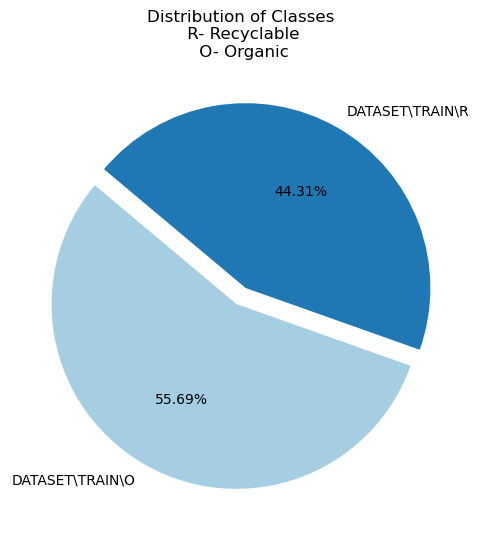

In [10]:
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    label_counts, 
    labels=label_counts.index, 
    autopct='%0.2f%%', 
    explode=[0.05] * len(label_counts),
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Classes\n R- Recyclable\n O- Organic')
plt.show()

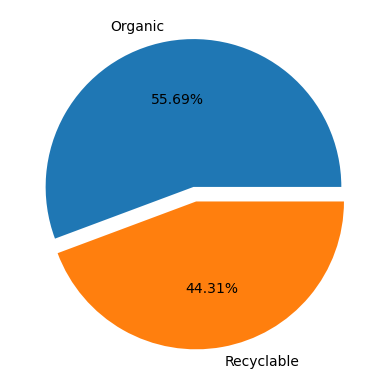

In [11]:
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',explode=[0.05,0.05])
plt.show()